# Tokenizing and Embedding
@hyyoka

In [ ]:
!pip install transformers

In [ ]:
import re
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from spacy.lang.en import English
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv("/content/spam.csv")

# 간단한 전처리

In [ ]:
# write a function to remove web links
def remove_html(text):
    text = re.sub(r"http://.+\.com" , "" , text)
    text = re.sub(r"http://\S+" , "" , text)
    text = re.sub(r"http://[A-Za-z0-9./?= *&:-]+" , "" , text)
    text = re.sub(r"http.+\.com" , "" , text)
    text = re.sub(r"http//[A-Za-z0-9./?= *&:-]+" , "" ,text)
    text = re.sub(r"www[.A-Za-z0-9/+-]+" , "" , text)
    return text

In [ ]:
def remove_mails(text):
    text = re.sub(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+(\.[a-zA-Z]{2,5})" , "" , text)
    return text

In [ ]:
df["v2"] = df["v2"].str.lower()
df["v2"] = df["v2"].apply(remove_html)
df["v2"] = df["v2"].apply(remove_mails)

In [ ]:
df

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


# Tokenizing


토큰화를 간단하고 단순하게 생각하면 안된다. 보다 섬세한 알고리즘이 필요한 이유를 정리하면 다음과 같다. 

1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.
- 단어 자체에서 구두점을 갖고 있는 경우
- 숫자 사이에 컴마(,)가 들어가는 경우

2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.
- clitics를 잘 처리하는가?
- compound words, Multiword expressions
- 약어를 잘 처리하는가?





In [ ]:
from nltk.tokenize import (word_tokenize, 
                           WordPunctTokenizer, 
                           TreebankWordTokenizer)
from transformers import BertTokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-large-cased')

In [ ]:
spacy = English()

In [ ]:
text1 = "I am actively looking for Ph.D. students."
print(word_tokenize(text1))
print(WordPunctTokenizer().tokenize(text1))
print(TreebankWordTokenizer().tokenize(text1))
print(tokenizer.tokenize(text1))
print(list(spacy(text1)))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.']
['I', 'am', 'actively', 'looking', 'for', 'Ph', '.', 'D', '.', 'students', '.']
['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.']
['I', 'am', 'actively', 'looking', 'for', 'Ph', '.', 'D', '.', 'students', '.']
[I, am, actively, looking, for, Ph.D., students, .]


In [ ]:
text2 = "Network Address number is 192.168.56.31."
print(word_tokenize(text2))
print(WordPunctTokenizer().tokenize(text2))
print(TreebankWordTokenizer().tokenize(text2))
print(tokenizer.tokenize(text2))
print(list(spacy(text2)))

['Network', 'Address', 'number', 'is', '192.168.56.31', '.']
['Network', 'Address', 'number', 'is', '192', '.', '168', '.', '56', '.', '31', '.']
['Network', 'Address', 'number', 'is', '192.168.56.31', '.']
['Network', 'Ad', '##dress', 'number', 'is', '192', '.', '168', '.', '56', '.', '31', '.']
[Network, Address, number, is, 192.168.56.31, .]


In [ ]:
text3 = "I'll be back as soon as possible."
print(word_tokenize(text3))
print(WordPunctTokenizer().tokenize(text3))
print(TreebankWordTokenizer().tokenize(text3))
print(tokenizer.tokenize(text3))
print(list(spacy(text3)))

['I', "'ll", 'be', 'back', 'as', 'soon', 'as', 'possible', '.']
['I', "'", 'll', 'be', 'back', 'as', 'soon', 'as', 'possible', '.']
['I', "'ll", 'be', 'back', 'as', 'soon', 'as', 'possible', '.']
['I', "'", 'll', 'be', 'back', 'as', 'soon', 'as', 'possible', '.']
[I, 'll, be, back, as, soon, as, possible, .]


In [ ]:
# compound adjectives
text4 = "My wife and daughter are both blue-eyed."
print(word_tokenize(text4))
print(WordPunctTokenizer().tokenize(text4))
print(TreebankWordTokenizer().tokenize(text4))
print(tokenizer.tokenize(text4))
print(list(spacy(text4)))

['My', 'wife', 'and', 'daughter', 'are', 'both', 'blue-eyed', '.']
['My', 'wife', 'and', 'daughter', 'are', 'both', 'blue', '-', 'eyed', '.']
['My', 'wife', 'and', 'daughter', 'are', 'both', 'blue-eyed', '.']
['My', 'wife', 'and', 'daughter', 'are', 'both', 'blue', '-', 'eyed', '.']
[My, wife, and, daughter, are, both, blue, -, eyed, .]


In [ ]:
# compound nouns
text5 = "Where is my cell phone?"
print(word_tokenize(text5))
print(WordPunctTokenizer().tokenize(text5))
print(TreebankWordTokenizer().tokenize(text5))
print(tokenizer.tokenize(text5))
print(list(spacy(text5)))

['Where', 'is', 'my', 'cell', 'phone', '?']
['Where', 'is', 'my', 'cell', 'phone', '?']
['Where', 'is', 'my', 'cell', 'phone', '?']
['Where', 'is', 'my', 'cell', 'phone', '?']
[Where, is, my, cell, phone, ?]


In [ ]:
# compound nouns + abbreviation
text5 = "I wanna eat hot dog."
print(word_tokenize(text5))
print(WordPunctTokenizer().tokenize(text5))
print(TreebankWordTokenizer().tokenize(text5))
print(tokenizer.tokenize(text5))
print(list(spacy(text5)))

['I', 'wan', 'na', 'eat', 'hot', 'dog', '.']
['I', 'wanna', 'eat', 'hot', 'dog', '.']
['I', 'wan', 'na', 'eat', 'hot', 'dog', '.']
['I', 'wanna', 'eat', 'hot', 'dog', '.']
[I, wanna, eat, hot, dog, .]


In [ ]:
clitics = "doesn't he'd don't he's it's i'm don't can't"
print(word_tokenize(clitics))
print(WordPunctTokenizer().tokenize(clitics))
print(TreebankWordTokenizer().tokenize(clitics))
print(tokenizer.tokenize(clitics))
print(list(spacy(clitics)))

['does', "n't", 'he', "'d", 'do', "n't", 'he', "'s", 'it', "'s", 'i', "'m", 'do', "n't", 'ca', "n't"]
['doesn', "'", 't', 'he', "'", 'd', 'don', "'", 't', 'he', "'", 's', 'it', "'", 's', 'i', "'", 'm', 'don', "'", 't', 'can', "'", 't']
['does', "n't", 'he', "'d", 'do', "n't", 'he', "'s", 'it', "'s", 'i', "'m", 'do', "n't", 'ca', "n't"]
['doesn', "'", 't', 'he', "'", 'd', 'don', "'", 't', 'he', "'", 's', 'it', "'", 's', 'i', "'", 'm', 'don', "'", 't', 'can', "'", 't']
[does, n't, he, 'd, do, n't, he, 's, it, 's, i, 'm, do, n't, ca, n't]


In [ ]:
comp = "high school, middle school"
print(word_tokenize(comp))
print(WordPunctTokenizer().tokenize(comp))
print(TreebankWordTokenizer().tokenize(comp))
print(tokenizer.tokenize(comp))
print(list(spacy(comp)))

['high', 'school', ',', 'middle', 'school']
['high', 'school', ',', 'middle', 'school']
['high', 'school', ',', 'middle', 'school']
['high', 'school', ',', 'middle', 'school']
[high, school, ,, middle, school]


토크나이저들을 확인해본 결과, compound words, Multiword Expression을 처리하지 못하는 것을 확인했다. 따라서 상대적으로 clitics와 .이 포함된 단어, 그리고 축약어 모두에 강점을 보인 spacy를 사용하기로 한다. 

# Lemmatizing & Stemming

데이터는 크게 두 가지 측면에서 평가한다: "**양과 질**". 모을 수 있는 데이터의 양은 한정되어 있으므로, 모델의 성능을 향상하기 위해서는 가지고 있는 데이터의 질을 높이는 작업이 이루어져야 한다. 

</br>

이번에는 데이터의 질을 높이기 위한 정규화(Normalization)의 기법 중, **어간 추출(Stemming)**과 **표제어 추출(Lemmatization)**을 확인해본다.  

두 기법은 모두 단어의 개수를 줄일 수 있는 방법으로, 보통 단어의 빈도수를 기반으로 하는 BoW 표현을 사용하는 자연어 처리 문제에서 사용된다. 자연어 처리에서 정규화의 지향점은 언제나 코퍼스의 복잡성을 줄이는 일이다. 위의 두 기법은 해당 목표에 기여한다. 

In [ ]:
from nltk.stem import (PorterStemmer,
                       LancasterStemmer,
                       WordNetLemmatizer)

In [ ]:
# Stemmer와 Lemmatizer 비교

s = PorterStemmer()
n = WordNetLemmatizer()
l = LancasterStemmer()

각각을 평가하기 위해서는, 가장 평범한 텍스트를 가져와야 한다고 생각했다. 따라서, 랜덤한 책을 골라, 첫 페이지의 첫 문단을 옮겨왔다. 

In [ ]:
text="""
There was no hope for him this time: it was the third stroke.
Night after night I had passed the house and studied the lighted square of window: 
and night after night I had found it lighted in the same way, faintly and evenly.
If he was dead, I thought, I would see the reflection of candles on the darkened blind for I knew that two candles must be set at the head of a corpse.
"""

In [ ]:
words = list(spacy(text))

stm_p = [s.stem(w.text) for w in words]
stm_l = [l.stem(w.text) for w in words]
lem = [n.lemmatize(w.text) for w in words]
lem_s = [w.lemma_ for w in words]
data = [words, stm_p, stm_l, lem, lem_s]

df1 = pd.DataFrame(data, index=["word", "stem_p","stem_l","lemma", "lemma_s"])
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88
word,\n,There,was,no,hope,for,him,this,time,:,it,was,the,third,stroke,.,\n,Night,after,night,I,had,passed,the,house,and,studied,the,lighted,square,of,window,:,\n,and,night,after,night,I,had,...,and,evenly,.,\n,If,he,was,dead,",",I,thought,",",I,would,see,the,reflection,of,candles,on,the,darkened,blind,for,I,knew,that,two,candles,must,be,set,at,the,head,of,a,corpse,.,\n
stem_p,\n,there,wa,no,hope,for,him,thi,time,:,it,wa,the,third,stroke,.,\n,night,after,night,I,had,pass,the,hous,and,studi,the,light,squar,of,window,:,\n,and,night,after,night,I,had,...,and,evenli,.,\n,If,he,wa,dead,",",I,thought,",",I,would,see,the,reflect,of,candl,on,the,darken,blind,for,I,knew,that,two,candl,must,be,set,at,the,head,of,a,corps,.,\n
stem_l,\n,ther,was,no,hop,for,him,thi,tim,:,it,was,the,third,stroke,.,\n,night,aft,night,i,had,pass,the,hous,and,study,the,light,squ,of,window,:,\n,and,night,aft,night,i,had,...,and,ev,.,\n,if,he,was,dead,",",i,thought,",",i,would,see,the,reflect,of,candl,on,the,dark,blind,for,i,knew,that,two,candl,must,be,set,at,the,head,of,a,corps,.,\n
lemma,\n,There,wa,no,hope,for,him,this,time,:,it,wa,the,third,stroke,.,\n,Night,after,night,I,had,passed,the,house,and,studied,the,lighted,square,of,window,:,\n,and,night,after,night,I,had,...,and,evenly,.,\n,If,he,wa,dead,",",I,thought,",",I,would,see,the,reflection,of,candle,on,the,darkened,blind,for,I,knew,that,two,candle,must,be,set,at,the,head,of,a,corpse,.,\n
lemma_s,\n,There,was,no,hope,for,him,this,time,:,it,was,the,third,stroke,.,\n,Night,after,night,I,had,passed,the,house,and,studied,the,lighted,square,of,window,:,\n,and,night,after,night,I,had,...,and,evenly,.,\n,If,he,was,dead,",",I,thought,",",I,would,see,the,reflection,of,candles,on,the,darkened,blind,for,I,knew,that,two,candles,must,be,set,at,the,head,of,a,corpse,.,\n


위의 텍스트로 분석한 결과, 일정한 오류 규칙이 보였다. 이 현상이 같은 활용형을 가진 다른 단어들에도 적용되나 확인하기 위해 다음의 워드셋을 가져왔다. 

In [ ]:
text="don\'t, doing, he's, can't, have, has, going, goes, gone, went, puppies, living, lives, fly, mainly, dies, watched, starting, policy, organization"
words = list(spacy(text))

stm = [s.stem(w.text) for w in words]
lem = [n.lemmatize(w.text) for w in words]
lem_s = [w.lemma_ for w in words]

data = [words, stm, lem, lem_s]
df2 = pd.DataFrame(data, index=["word", "stem","lemma", "lemm_S"])
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
word,do,n't,",",doing,",",he,'s,",",ca,n't,",",have,",",has,",",going,",",goes,",",gone,",",went,",",puppies,",",living,",",lives,",",fly,",",mainly,",",dies,",",watched,",",starting,",",policy,",",organization
stem,do,n't,",",do,",",he,'s,",",ca,n't,",",have,",",ha,",",go,",",goe,",",gone,",",went,",",puppi,",",live,",",live,",",fli,",",mainli,",",die,",",watch,",",start,",",polici,",",organ
lemma,do,n't,",",doing,",",he,'s,",",ca,n't,",",have,",",ha,",",going,",",go,",",gone,",",went,",",puppy,",",living,",",life,",",fly,",",mainly,",",dy,",",watched,",",starting,",",policy,",",organization
lemm_S,do,not,",",doing,",",-PRON-,'s,",",can,not,",",have,",",has,",",going,",",goes,",",gone,",",went,",",puppies,",",living,",",lives,",",fly,",",mainly,",",dies,",",watched,",",starting,",",policy,",",organization


In [ ]:
words="cats loves running taking enjoyed studied simplest clever modest better linguistics tooth computer"
words = list(spacy(words))
stm = [s.stem(w.text) for w in words]
lem = [n.lemmatize(w.text) for w in words]
lem_s = [w.lemma_ for w in words]

data = [words, stm, lem, lem_s]
df2 = pd.DataFrame(data, index=["word", "stem","lemma", "lemm_S"])
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
word,cats,loves,running,taking,enjoyed,studied,simplest,clever,modest,better,linguistics,tooth,computer
stem,cat,love,run,take,enjoy,studi,simplest,clever,modest,better,linguist,tooth,comput
lemma,cat,love,running,taking,enjoyed,studied,simplest,clever,modest,better,linguistics,tooth,computer
lemm_S,cats,loves,running,taking,enjoyed,studied,simplest,clever,modest,better,linguistics,tooth,computer


해당 단어들로 **PorterStemmer**를 이용해본 결과, 다음의 규칙적인 오류가 발견되었다. 

- s: 동사를 명사라고 판단해, s를 떼어버리는 오류 *ex) was -> wa*
- y: 동사나 부사의 끝이 y로 끝나는 경우, 이를 i로 대치 *ex) study -> studi, faintly -> faintli, evenly -> evenli* 
- e: 명사임에도 불구하고, 마지막의 e를 제거하는 오류 *ex) house, square, corpse*
- 명사의 복수형: 복수에서 단수로 되돌리는 과정에서 과잉삭제하는 경우 *ex) candles -> candl*
- 동사의 복수형: 복수에서 단수로 되돌리는 과정에서 과소삭제하는 경우 *ex) goes -> goe*

해당 단어들로 **WordNetLemmatizer**를 이용해본 결과, 전반적으로 오류가 적었지만 그럼에도 불구하고 다음의 오류가 발견되었다. 
- s: 동사를 명사라고 판단해, s를 떼어버리는 오류 *ex) was -> wa, has->ha*
- 동사의 복수형: 복수에서 단수로 되돌리는 과정에서 과소삭제하는 경우 *ex) goes -> goe*
이 외에도, *dies*를 *dy*로 바꾸는 오류가 발생했다. 
그럼에도 불구하고, 동사의 명사화(ex.-tion) 등의 경우에서는 꽤나 훌륭한 결과를 보였다. 


앞서 언급했듯, 대부분의 오류는 명사, 동사, 부사 등의 품사를 판별하지 못해 발생했다. 
그러나 이외에도  lie-lay-lain / lay-laid-laid와 같이 활용 형태는 같지만 본 단어는 다른 경우가 문제가 될 수 있다. 

이러한 이유 외에도 이들은 규칙 기반으로 이루어져있기 때문에, 좀 더 섬세한 규칙이 필요하다. 


가장 좋은 성능을 보인 것은 **Spacy**의 lemmatizer였다. 비록 복수형을 기본형으로 바꾸는 데에 약점을 보였지만, 그럼에도 불구하고 clitics를 원형으로 바꾸는 데 아주 우수한 성능을 보였다. 설명했듯, 복수형을 기본형으로 바꾸는 것은 매우 어려운 작업이기 때문에 많은 오류가 나타난다. spacy는 이를 의식해서인지 아예 복수형을 기본형으로 바꾸지 않는 경우가 있지만, 오류보다는 그것이 낫기에 spacy를 이용해 lemmatizign을 진행한다. 


In [ ]:
punc = "[~,!?\":;()-^ì<=>å£?@_#$%&]"
FILTER = re.compile(punc)
noNeed = ["txt","ltgt"]

In [ ]:
s = "(apple$%^&* is** good~~~ txt"
s = FILTER.sub("", s)
s

'apple is good txt'

In [ ]:
def with_process_token(text):
    with_text = []
    text = FILTER.sub("", text)
    tokens = list(spacy(text))
    for token in tokens:
        token = token.lemma_
        if token in noNeed: continue
        with_text.append(token)
    return with_text

def without_process_token(text):
    without_text = []
    text = FILTER.sub("", text)
    tokens = list(spacy(text))
    for token in tokens:
        if token.text in noNeed: continue
        if token.is_stop: continue
        token = token.lemma_
        without_text.append(token)
    return without_text

In [ ]:
df['with'] = df['v2'].apply(with_process_token)
df['without'] = df['v2'].apply(without_process_token)

In [ ]:
df.head()

,v1,v2,with,without
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, crazy, available, o...","[jurong, point, crazy, available, bugis, n, gr..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, , a, wkly, comp, to, win, f...","[free, entry, , wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, early, hor, u, c]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, not, think, he, goes, to, usf, he...","[nah, think, goes, usf, lives]"


# Frequency

빈도는 여전히 중요한 피쳐이다. 전산언어학에서 단어 단위 분석을 진행할 때 필수적으로 요구하는 피쳐이기도 하다. 따라서 이번에는 텍스트에서 빈번하게 등장하는 토큰들을 통해 spam 텍스트의 성격을 파악하는 것을 목표로 한다. 텍스트에 속해있는 단어들의 개수를 쉽게 세고, 빠르게 정렬하기 위해 collection 라이브러리의 Counter()를 사용하였다. 

In [ ]:
without_spam = df[df['v1']=="spam"]["without"]
without_ham = df[df['v1']!="spam"]["without"]

In [ ]:
without_spam_vocab = []
for l in without_spam: without_spam_vocab+=l

without_ham_vocab = []
for l in without_ham: without_ham_vocab+=l

In [ ]:
spam_freq_list = Counter(without_spam_vocab).most_common(503)
spam_freq_l = [l[0] for l in spam_freq_list if l[0][0]!=' ']
ham_freq_list = Counter(without_ham_vocab).most_common(503)
ham_freq_l = [l[0] for l in ham_freq_list if l[0][0]!=' ']

In [ ]:
print(len(ham_freq_l))
print(len(spam_freq_l))

500
500


In [ ]:
df1 = pd.DataFrame([spam_freq_l, ham_freq_l], index=['spam', 'ham'])
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
spam,free,u,ur,mobile,text,stop,claim,reply,prize,won,p,nokia,new,send,urgent,cash,win,contact,service,week,guaranteed,customer,tone,phone,box,ppm,chat,awarded,draw,mins,latest,line,receive,camera,message,holiday,landline,shows,st,apply,...,logo,close,post,wcnxx,loan,purpose,tenants,refused,cwwx,conditions,ring,daily,forwarded,txtauction,break,muz,qxj,cm,ae,reveal,cust,remove,ibiza,vip,address,sale,cheap,money,away,getting,contract,d,registered,subscriber,bored,let,future,takes,rally,delivered
ham,u,not,ok,got,ur,know,like,come,good,day,time,love,going,want,home,lor,need,sorry,n,later,da,r,today,think,send,tell,hi,oh,night,hey,happy,',s,wat,d,great,way,hope,pls,dear,...,hungry,nd,calls,cash,askd,uncle,tired,ni,contact,joy,bank,gr,minute,xmas,semester,laptop,tel,takes,blue,swing,die,chance,ish,ago,chikku,seen,couple,mins,supposed,listen,gym,game,darren,holiday,picking,word,ugh,knew,grins,difficult


예상대로 spam과 ham에서의 최대 빈도 단어들은 명확한 차이를 보였다. 일상적인 단어(got, come, dat, time, love, sorry, want)와 구어 표현(u, r, wat)이 두드러지는 ham의 단어들과 달리, spam에서는 상업적이고 소비를 권장하는 단어들 (free, prize, new, urgent, cah, win, service, guaranteed, customer)이 주를 이루었다. 

# Embedding 진행

> [임베딩] 사람이 쓰는 자연어를 기계가 이해할 수 있도록 숫자의 나열인 “벡터”로 바꾸는 결과와 과정

- FROM "***onehot-encoding***" 

    "안녕 내 이름은 효원이야" 中 "이름은" </br>
$[0,0,0,0] \rightarrow [0,0,1,0]$

    - 단점: 차원 & 의미 표현 

</br>


- TO "***embedding_vector***"
    - ![대체 텍스트](https://i.imgur.com/TLkEBWK.png)

워드 임베딩은 "**무슨 정보를 이용해 단어를 표현하느냐**"에 따라 다양한 종류로 나누어진다. 

|종류|정보|설명|
|-|-|-|
|Word2Vec|주변 단어|한 단어의 주변 단어를 통해 그 단어의 의미를 파악 : context=>target인 CBOW 모델 & target=>context인 skip-gram 모델|
|FastText|주변 단어 + n-gram|Word2Vec과 유사한 방식으로 학습하나, 단어를 n-gram으로 나누어 학습하여 subword information을 고려|
| GloVe|주변 단어 + 전체 코퍼스의 분포|한 단어의 의미를 표현하는 데 주변 단어만 고려한다는 한계를 극복하기 위해 전체 코퍼스의 통계 정보를 고려|

### Word2vec

In [ ]:
with_spam = df[df['v1']=="spam"]["with"]
with_ham = df[df['v1']!="spam"]["with"]

with_spam_vocab = []
for l in with_spam: with_spam_vocab+=l
with_ham_vocab = []
for l in with_ham: with_ham_vocab+=l

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

with_spam_model = Word2Vec([with_spam_vocab], size=100, sg=1, window=5, min_count=2, iter=100)
print(with_spam_model)

Word2Vec(vocab=1208, size=100, alpha=0.025)


In [ ]:
X = []
for v in spam_freq_l:
    try: X.append(with_spam_model[v])
    except: continue 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=spam_freq_l, columns=['x', 'y'])

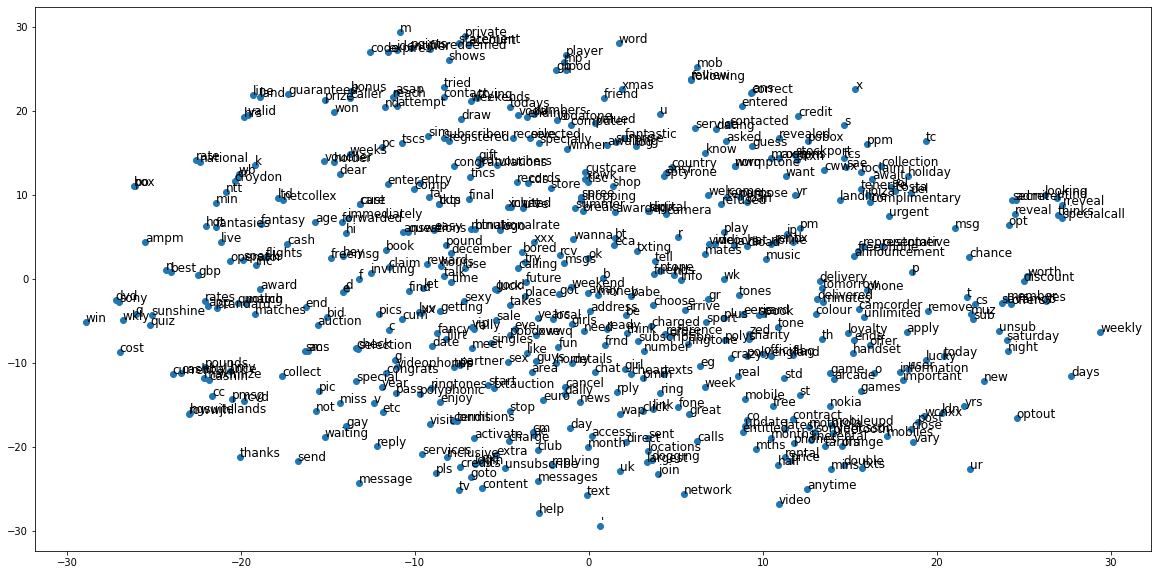

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=12)
plt.show()

word2vec의 spam cluster를 확인해본 결과, 조금 특이한 뭉치를 발견했다. 

singles, meet, parter, date, sex 등의 단어들이 클러스터를 이뤘다는 것이다. 클러스터의 특징은 가운데로 갈수록 해당 말뭉치에서 일반적인 단어들로 이루어진다. 그 사실을 명심하고 다시 확인하자, bored, try, wanna,, tell 등의 부추기는 듯한 단어들을 확인할 수 있었다. 

In [ ]:
with_ham_model = Word2Vec([with_ham_vocab], size=100, sg=1, window=5, min_count=2, iter=100)
print(with_ham_model)

Word2Vec(vocab=3237, size=100, alpha=0.025)


In [ ]:
X = []
for v in ham_freq_l:
    try: X.append(with_ham_model[v])
    except: continue 
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=ham_freq_l, columns=['x', 'y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


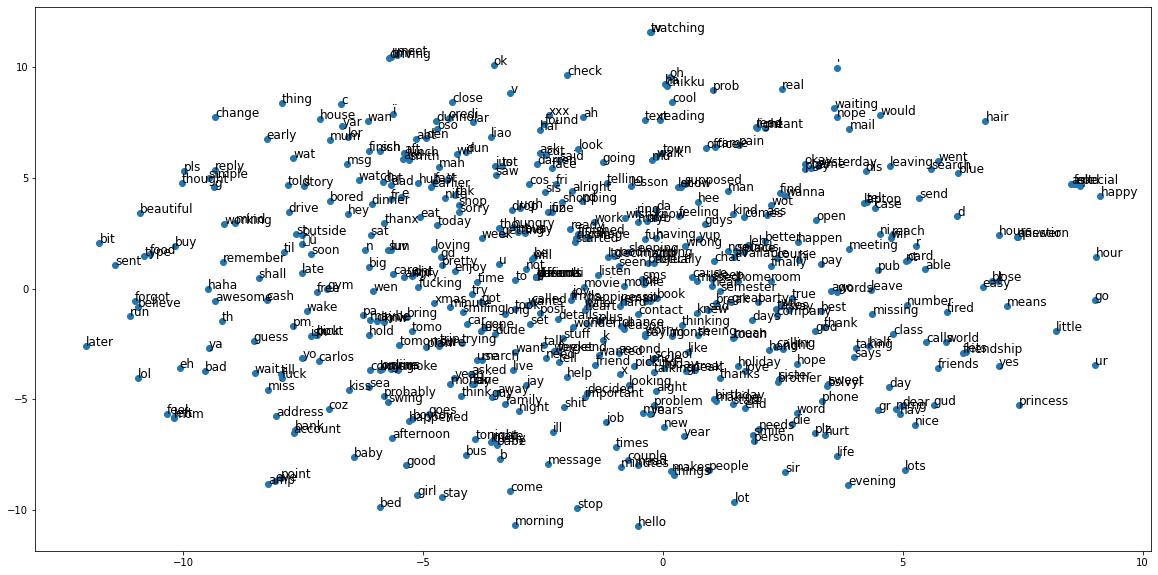

In [ ]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=12)
plt.show()

위의 spam 클러스터와는 완전히 다른 양상을 보인다. 우선, 가운데에 보여있는 아이들이 보통, having, mivue, listen, wrong, feeking, work 등의 일상적인 표현임을 확인할 수 있었고, 특히 부정적인 표현의 사용도 잦았다. 

즉, spam과 ham 메일이 분포적으로 매우 다르다는 것이다. 

### FastText

In [ ]:
from gensim.models import FastText

In [ ]:
ft_with_ham_model = FastText([with_spam_vocab], size=100, window=5, min_count=2, iter=100)
print(ft_with_ham_model)

FastText(vocab=1208, size=100, alpha=0.025)


In [ ]:
X = []
for v in spam_freq_l:
    try: X.append(ft_with_ham_model[v])
    except: continue 
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=spam_freq_l, columns=['x', 'y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


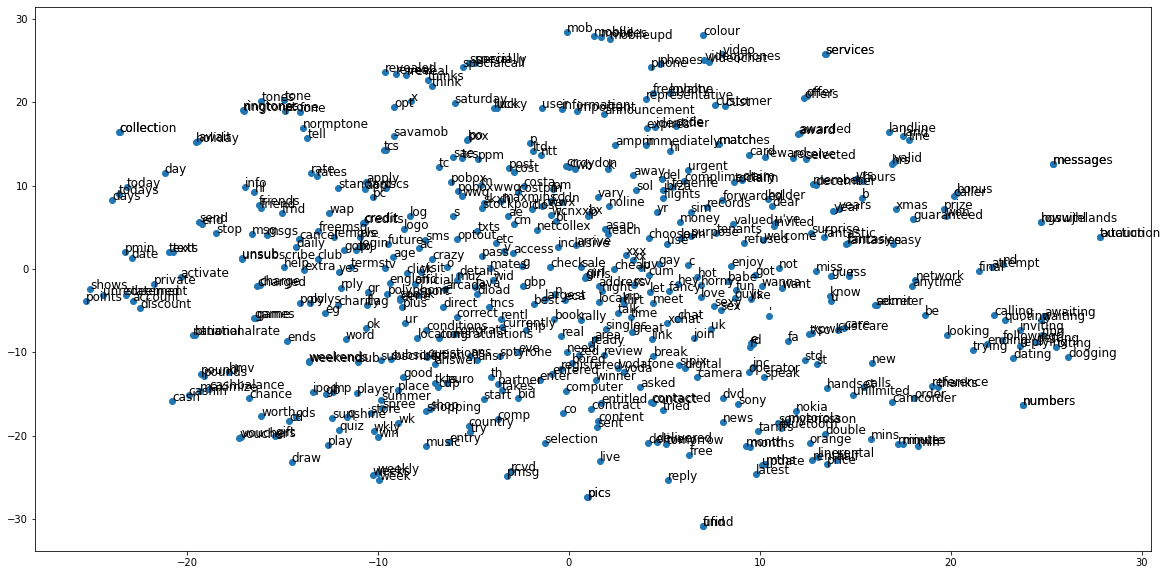

In [ ]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=12)
plt.show()

FastText도 전반적으로 비슷한 양상이 나타났다. 

In [ ]:
!pip install glove_python_binary

     |████████████████████████████████| 952kB 5.5MB/s 


In [ ]:
from glove import Glove 
from glove import Corpus

In [ ]:
df2 =pd.DataFrame(with_spam_vocab)
df2.to_csv("data.txt")

In [ ]:
import gensim
# 코퍼스 객체를 선언합니다. 

data = gensim.models.word2vec.Text8Corpus("/content/data.txt")
corpus = Corpus()

# glove 모델에서 사용하기 위해서 모양을 알맞게 바꾸어줍니다. 
corpus.fit(data,window=2)

# 모델을 선언합니다. 
model = Glove(no_components=5, learning_rate=0.05)

# 모델을 학습합니다. 학습 수는 200입니다. 
model.fit(corpus.matrix, epochs=200, no_threads=4, verbose=False)

# glove 모델을 사용하기 위해서는 모델에 해당 단어 사전을 올려줘야합니다. 
model.add_dictionary(corpus.dictionary)

In [ ]:
model.most_similar('free')